# Project: Investigate a Dataset ( TMDB  Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### introduction 
<span style="color: red;">**Dataset brief** : This data set contains information about movies, including user ratings and revenue , budget ,
popularity ,cast and genres and
>It also have many columns , total rows is 10866 and total columns is  21 columns</span>

**Questions**

<span style="color:green; font-family:Trebuchet MS;">Which genres are most popular from year to year?</span>

<span style="color:green; font-family:Trebuchet MS;">Which one has the highest revenue based on genre ?

<span style="color:green; font-family:Trebuchet MS;">Which one has a high budget based on genre ?

<span style="color:green; font-family:Trebuchet MS;">Most popular movie based on genre ?

<span style="color:green; font-family:Trebuchet MS;">what is the relationship between production budget, revenue, and profit ?</span>

###### Packges that I will use 

In [1]:
import pandas as pd # >>>> used for data manipulation and analysis
import numpy as np # >>>> used for mathematical functions
import matplotlib.pyplot as plt # >>> used for visulaiztion 

C:\Users\amsaa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load the dataset 
df = pd.read_csv(r"C:\Users\amsaa\Downloads\Compressed\tmdb-movies.csv\tmdb-movies.csv")
# print some of lines 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# to know more about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# to show the statistics of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check the dataset is clean ?

null= df.isnull().sum()
null

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
duplicate_values = df.duplicated().sum()
duplicate_values

1

In [7]:
drop_duplicate = df.drop_duplicates(inplace=True)

In [8]:
print("Data types:\n", df.dtypes)


Data types:
 id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning 
<span style="color: blue;"
      >**Fill null values and delete unimportant values and duplicate values**

In [9]:
# TO know what is *mode* most comman value in geners,cast and keyword column  

value_counts= df['genres'].value_counts()    # in geners
most_common_value = value_counts.idxmax()
print('the most comman value :',most_common_value)


values_cast = df['cast'].value_counts()     # in cast 
value_cast_common = values_cast.idxmax()
print('the most comman value :',value_cast_common)


mode_keywords= df['keywords'].value_counts()  # in keyword
mode_key = mode_keywords.idxmax()
print('the most comman value :',mode_key)

the most comman value : Comedy
the most comman value : Louis C.K.
the most comman value : woman director


In [10]:
df['genres'].fillna('Comedy', inplace=True)       # to fill the missing values 
print('the null is : ' ,df['genres'].isnull().sum())     # to ensure that null values are placed by new values 

df['keywords'].fillna('woman director' ,inplace = True )
print('the null is :',df['keywords'].isnull().sum())

the null is :  0
the null is : 0


C:\Users\amsaa\AppData\Local\Temp\ipykernel_10800\2193622691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('Comedy', inplace=True)       # to fill the missing values
C:\Users\amsaa\AppData\Local\Temp\ipykernel_10800\2193622691.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [11]:
# drop the columns that i don't need for my qusentios 

df.drop('homepage' , axis = 1 , inplace = True)
df.drop('imdb_id' , axis = 1 , inplace = True)
df.drop('director' , axis = 1 , inplace = True)
df.drop('tagline' , axis = 1 , inplace = True)

In [12]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


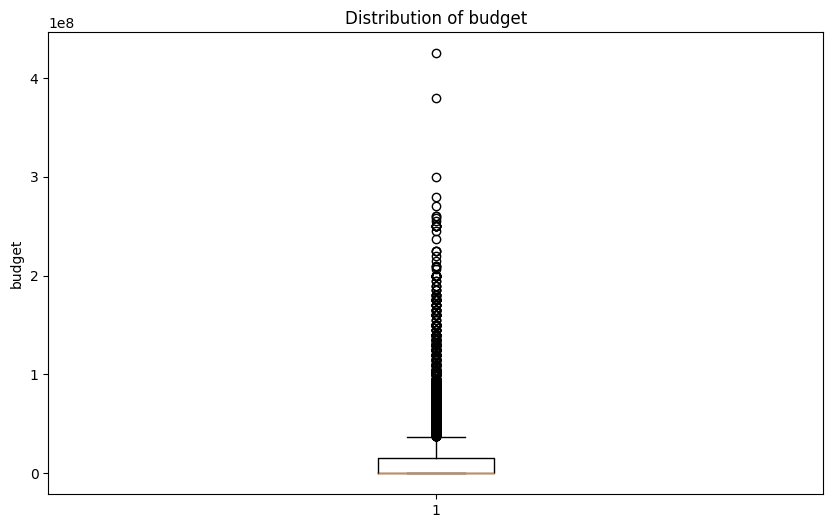

In [51]:
import matplotlib.pyplot as plt

def analyze_numeric_variable(data, column, plot_type='box'):
    """
    Analyze a numeric variable in the dataset by plotting its distribution.

    Parameters:
    - data: DataFrame containing the dataset
    - column: Name of the numeric column to analyze
    - plot_type: Type of plot to generate ('box') (default is 'box')

    Returns:
    - None
    """

    # Filter out missing values
    data = data.dropna(subset=[column])

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column])

    # Add labels and title
    plt.title(f'Distribution of {column}')
    plt.ylabel(column)

    # Show plot
    plt.show()

# Example usage:
analyze_numeric_variable(df, 'budget')


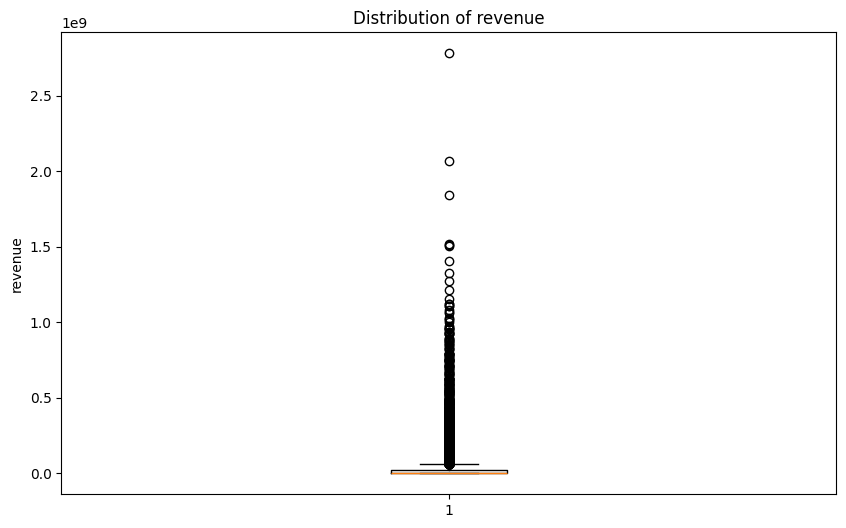

In [53]:
analyze_numeric_variable(df, 'revenue')


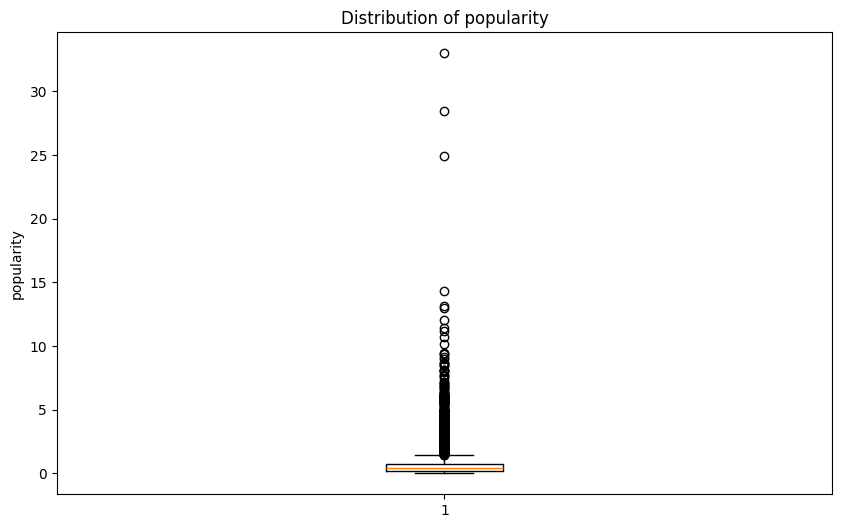

In [54]:
analyze_numeric_variable(df, 'popularity')


#  Exploratory Data Analysis

<span style="color:blue; font-family:Impact;">Research Question 1 (Which genres are most popular from year to year)</span>

In [13]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year # to get the year from 'release_date' column using to_datetime 


C:\Users\amsaa\AppData\Local\Temp\ipykernel_10800\1747868408.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_year'] = pd.to_datetime(df['release_date']).dt.year # to get the year from 'release_date' column using to_datetime


In [14]:
# to split the genres 
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')  

In [15]:
# we groupby the 2 columns that help us th answer the qouestion below 
genre_counts = df_genres.groupby(['release_year', 'genres']).size().reset_index(name='count')

In [16]:
# to locate the loaction that we need 
most_popular_genre = genre_counts.loc[genre_counts.groupby('release_year')['count'].idxmax()]

In [17]:
print(most_popular_genre)


      release_year  genres  count
6             1974   Drama     21
25            1975   Drama     17
42            1976   Drama     22
62            1977   Drama     24
80            1978   Drama     29
99            1979   Drama     30
114           1980   Drama     32
134           1981   Drama     32
152           1982   Drama     33
171           1983   Drama     35
191           1984   Drama     40
206           1985  Comedy     51
226           1986   Drama     51
241           1987  Comedy     57
259           1988  Comedy     69
278           1989  Comedy     64
300           1990   Drama     60
320           1991   Drama     63
339           1992   Drama     65
358           1993   Drama     90
374           1994  Comedy     88
397           1995   Drama     93
416           1996   Drama    104
435           1997   Drama     83
454           1998   Drama    108
474           1999   Drama    113
494           2000   Drama    101
511           2001  Comedy    102
534           

In [18]:
# Filter data becaues there are incorrect data (greater than 2024) >> so we print the years that greater than curent year
Extra_years_data = most_popular_genre[most_popular_genre['release_year'] > 2024]

# Display the filtered data
print(Extra_years_data)


      release_year  genres  count
808           2060   Drama     13
825           2061   Drama     16
841           2062   Drama     21
857           2063  Comedy     13
876           2064   Drama     20
894           2065   Drama     20
910           2066  Comedy     16
928           2067  Comedy     17
947           2068   Drama     20
964           2069   Drama     13
983           2070   Drama     19
1002          2071   Drama     30
1021          2072   Drama     16
1037          2073   Drama     31


In [19]:
# Filter data with greater years (greater than 2024)
future_years_data = most_popular_genre[most_popular_genre['release_year'] > 2024]


# Remove rows with extra years from the original DataFrame
cleaned_most_popular_genre = most_popular_genre.drop(future_years_data.index)

# Display the cleaned DataFrame
print(cleaned_most_popular_genre)


     release_year  genres  count
6            1974   Drama     21
25           1975   Drama     17
42           1976   Drama     22
62           1977   Drama     24
80           1978   Drama     29
99           1979   Drama     30
114          1980   Drama     32
134          1981   Drama     32
152          1982   Drama     33
171          1983   Drama     35
191          1984   Drama     40
206          1985  Comedy     51
226          1986   Drama     51
241          1987  Comedy     57
259          1988  Comedy     69
278          1989  Comedy     64
300          1990   Drama     60
320          1991   Drama     63
339          1992   Drama     65
358          1993   Drama     90
374          1994  Comedy     88
397          1995   Drama     93
416          1996   Drama    104
435          1997   Drama     83
454          1998   Drama    108
474          1999   Drama    113
494          2000   Drama    101
511          2001  Comedy    102
534          2002   Drama    130
551       

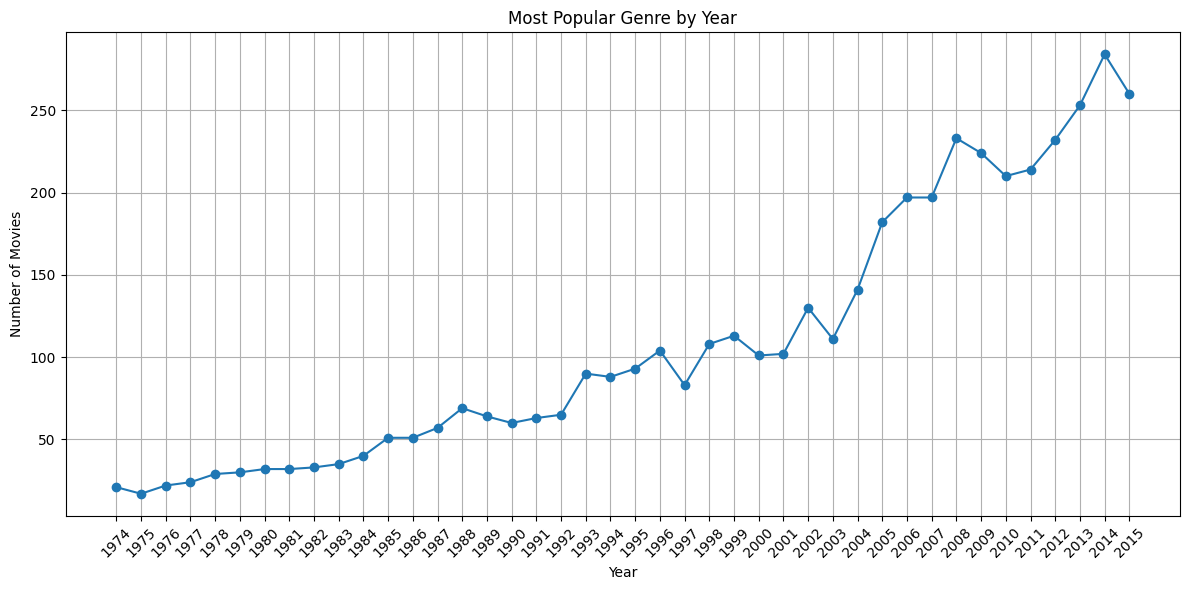

In [20]:
# here we visualize  the output for easy understanding  

plt.figure(figsize=(12, 6))
plt.plot(cleaned_most_popular_genre['release_year'], cleaned_most_popular_genre['count'], marker='o', linestyle='-')
plt.title('Most Popular Genre by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(cleaned_most_popular_genre['release_year'], rotation=45)
plt.tight_layout()
plt.show()

<span style="color:blue; font-family:Impact;">Research Question 2 (Which one has the highest revenue based on genre)</span>

In [21]:
genre_revenue = df_genres.groupby('genres')['revenue'].sum()

# Calculate average revenue for each genre
genre_average_revenue = df_genres.groupby('genres')['revenue'].mean()

# Find the genre with the highest average revenue
highest_revenue_genre = genre_average_revenue.idxmax()
highest_revenue_value = genre_average_revenue.max()

print(f"The genre with the highest average revenue is '{highest_revenue_genre}' with an average revenue of ${highest_revenue_value:.2f}.")

The genre with the highest average revenue is 'Adventure' with an average revenue of $113137861.07.


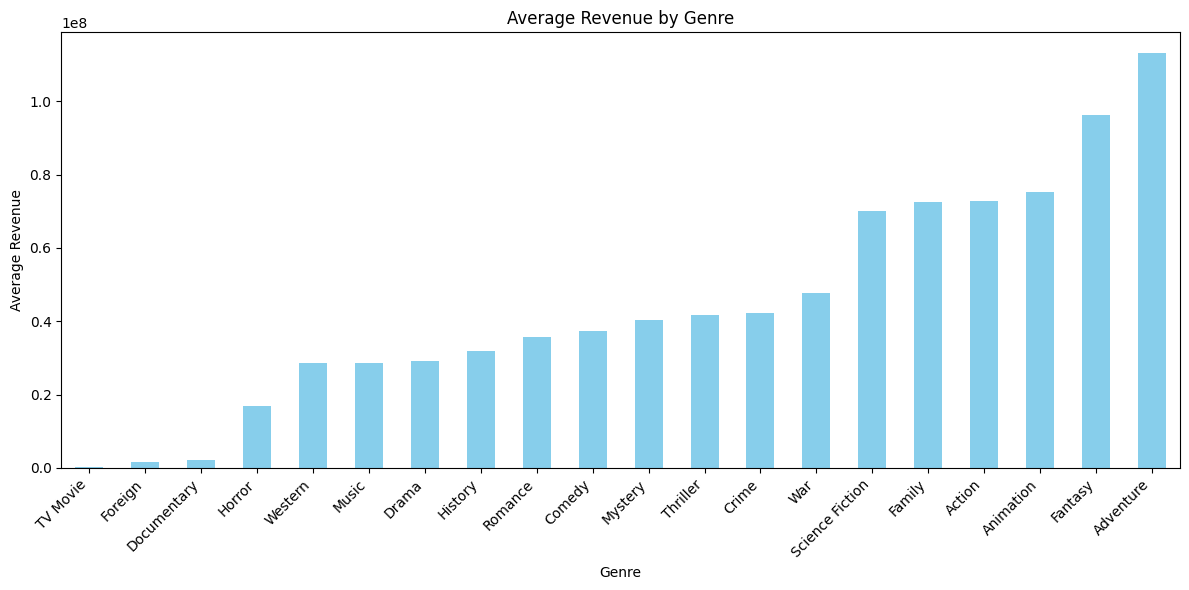

In [22]:
# here we visualize  the output for easy understanding  

plt.figure(figsize=(12, 6))
genre_average_revenue.sort_values(ascending=True).plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<span style="color:blue; font-family:Impact;">Research Question 3  (Which one has a high budget based on genre ?)</span>

In [23]:
genre_budget = df_genres.groupby('genres')['budget'].sum()

# Find the genre with the highest total budget
highest_budget_genre = genre_budget.idxmax()
highest_budget_value = genre_budget.max()

print(f"The genre with the highest total budget is '{highest_budget_genre}' with a total budget of ${highest_budget_value:.2f}.")

The genre with the highest total budget is 'Action' with a total budget of $66103123670.00.


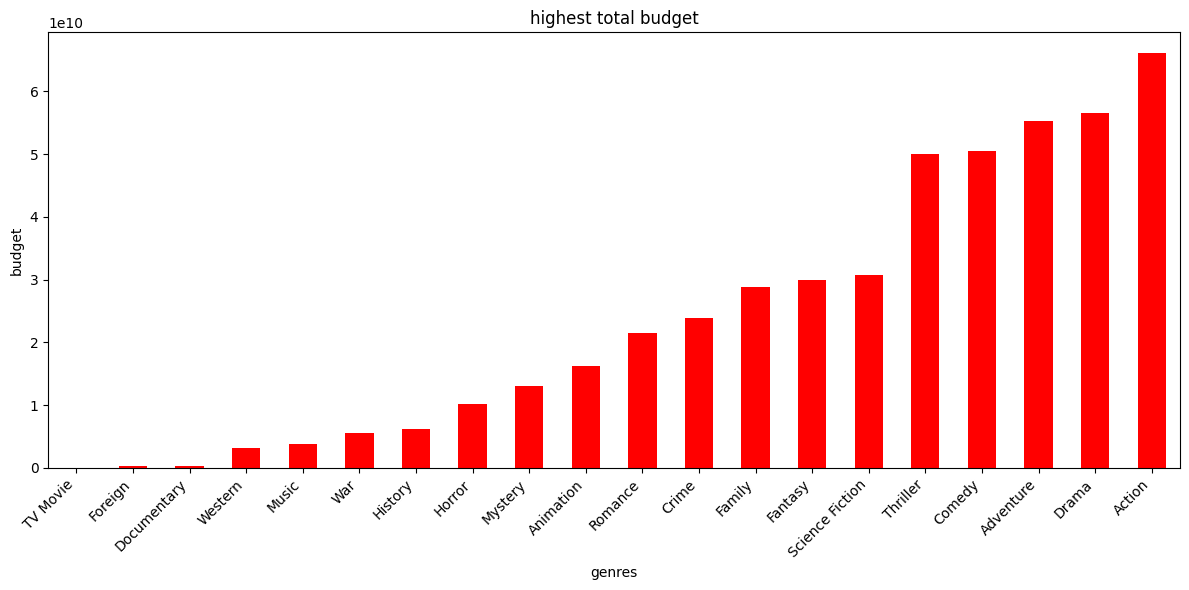

In [24]:
# here we visualize  the output for easy understanding  

plt.figure(figsize=(12,6))
genre_budget.sort_values(ascending=True).plot(kind='bar' , color = 'red')
plt.title('highest total budget')
plt.xlabel('genres')
plt.ylabel('budget')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<span style="color:blue; font-family:Impact;">Research Question 4 (Most popular movie based on genre ?) </span>


In [29]:
genre_total_popularity  = df.groupby('genres')['popularity'].sum()

most_popular_genre = genre_total_popularity.idxmax()          # to know the common value 
most_popular_genre_popularity = genre_total_popularity.max()
print(f"The genre with the highest popularity is '{most_popular_genre_popularity}'.")

The genre with the highest popularity is '379.1111449999999'.


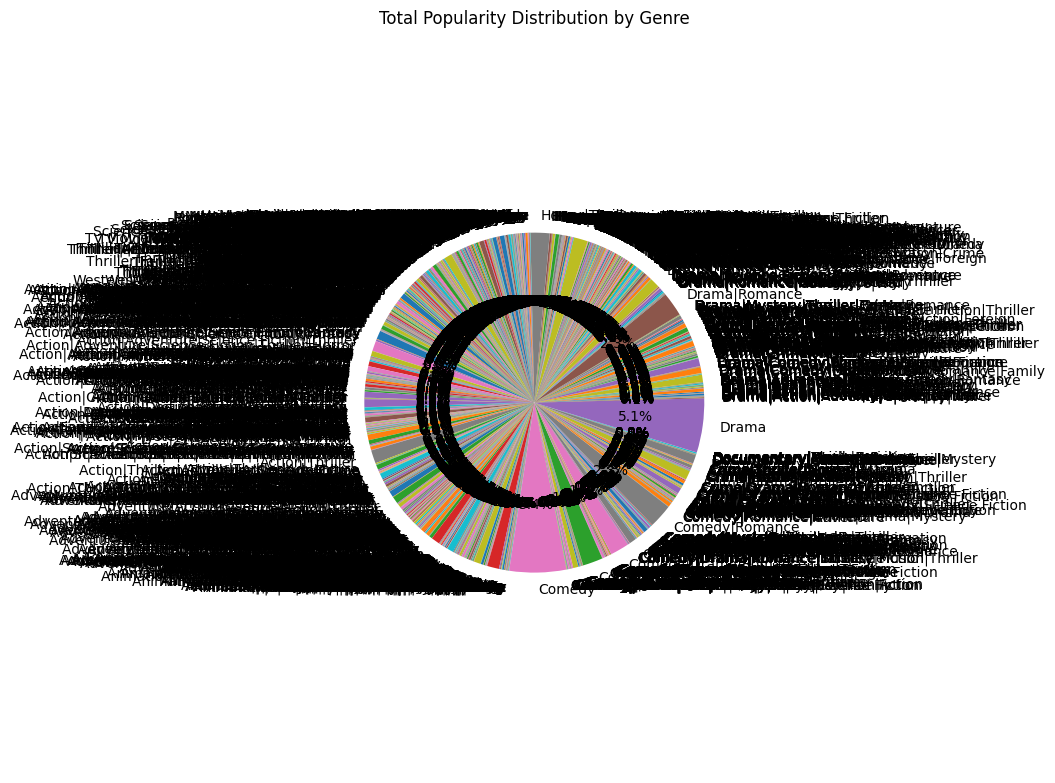

In [30]:
plt.figure(figsize=(10, 8))
plt.pie(genre_total_popularity, labels=genre_total_popularity.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Popularity Distribution by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle >> get from reserch and chat-GPT
plt.tight_layout()
plt.show()

<span style="color:blue; font-family:Impact;"> Research Question 5 ( what is the relationship between production budget, revenue, and budget , profit ? ?)  </span>


In [32]:
column1 = 'budget'
column2 = 'revenue'

#  the correlation between the two columns
correlation = df[column1].corr(df[column2])

# Print the correlation 
print(f"The correlation between '{column1}' and '{column2}' is: {correlation:.2f}")

The correlation between 'budget' and 'revenue' is: 0.73


In [33]:
df['net_profit'] = df['revenue'] - df['budget']

# Print the DataFrame with net profit
print(df[[ 'budget', 'revenue', 'net_profit']])

          budget     revenue  net_profit
0      150000000  1513528810  1363528810
1      150000000   378436354   228436354
2      110000000   295238201   185238201
3      200000000  2068178225  1868178225
4      190000000  1506249360  1316249360
...          ...         ...         ...
10861          0           0           0
10862          0           0           0
10863          0           0           0
10864          0           0           0
10865      19000           0      -19000

[10865 rows x 3 columns]


In [34]:
column3 = 'budget'
column4 = 'net_profit'

#  the correlation between the two columns
correlation = df[column3].corr(df[column4])

# Print the correlation 
print(f"The correlation between '{column3}' and '{column4}' is: {correlation:.2f}")

The correlation between 'budget' and 'net_profit' is: 0.57


<a id='conclusions'></a>
## Conclusions




After thoroughly examining the TMDB movie dataset and addressing various questions, we've uncovered valuable insights that can guide the company's decisions. The analysis involved organizing and cleaning the data, followed by exploring trends and patterns. However, it's important to acknowledge two limitations we faced: the potential for missing or incomplete data, and the reliance on publicly available data from the TMDB dataset.

Main Findings:

Genre Popularity: 'Drama' movies are consistently the most popular, followed closely by 'Comedy'. This suggests making more 'Drama' movies could be beneficial.

Revenue by Genre: 'Adventure' movies bring in the most revenue on average, making them potentially lucrative.

Budget Allocation: 'Action' movies have the highest total budget, indicating significant investment in this genre.

Genre Popularity: 'Comedy' movies are the most popular overall.

Budget-Revenue Relationship: There's a strong positive correlation (0.73) between movie budget and revenue, meaning higher budgets often lead to higher revenue. However, this doesn't mean one causes the other.

Limitations:

The analysis may have been impacted by missing or incomplete data, potentially leading to inaccuracies in the findings.
one limitation encountered in the project is the reliance on the TMDB movie dataset, which may not fully represent the diversity and complexity of the movie industry due to potential omissions of certain films, genres, or time periods. Additionally, variations in the dataset's completeness and accuracy could introduce biases or inaccuracies into the analysis results. Therefore, it's important to interpret the findings cautiously, recognizing that they may not provide a comprehensive overview of the entire movie industry landscape.






.
Recommendations:

To address these limitations, I suggest:

Further research into genre popularity and revenue drivers, considering additional data sources.
Improving data quality and completeness to enhance analysis reliability.
Collaboration with industry experts for deeper insights and validation of findings.
Conclusion:

Despite these limitations, our analysis provides valuable insights for the company's decision-making. Moving forward, we'll continue refining our methods and exploring new opportunities in the movie industry while remaining mindful of the potential limitations inherent in the data.

### I used a lot of functions that we learned in program specialy in Pandas like how to read the csv. file and also how to get the five number summary and info , isnull , fillna , drop , duplicates , groupby and more in addition plt 

## **Suggestions** 

<span style="color:blue; font-family:Trebuchet MS;">Obviously the highest budget is "Action" based on analytics but also the highest revenue is "Adventure" so it would be good if they reduce the budget for "Action" it would be beneficial because "Action" does not have good revenue and increase from "Comedy" and " Adventure"</span>
